In [1]:
import datetime as dt
import pandas as pd
import numpy as np
import alphalens as al
import scipy.stats as ss
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
style.use('seaborn-poster')

mod_path = '/Users/richard.wuebker/Projects/price_data_utils'
if mod_path not in sys.path:
    sys.path.append(mod_path)
    
from data_loader import DataLoader
from mp_historical_prices import HistoricalPrices

In [2]:
dl = DataLoader(prices_dir='../../price_data_utils/prices', info_dir='../../price_data_utils/info', 
                analysis_date_str='2019-07-26', cached_dir='../../price_data_utils/cached')
dl.load_data()

Prediction Date: 2019-07-30


  1%|▏         | 13/965 [00:00<00:16, 58.16it/s]

adjusting data for ticker: SITC and this time frame: year_ago
adjusting data for ticker: SITC and this time frame: year_ago


  4%|▍         | 40/965 [00:00<00:22, 41.00it/s]

adjusting data for ticker: FOX and this time frame: year_ago
adjusting data for ticker: FOX and this time frame: year_ago


 22%|██▏       | 217/965 [00:10<01:04, 11.61it/s]

adjusting data for ticker: FTDR and this time frame: year_ago
adjusting data for ticker: FTDR and this time frame: year_ago


 39%|███▉      | 375/965 [00:28<01:16,  7.71it/s]

adjusting data for ticker: ESTC and this time frame: year_ago
adjusting data for ticker: ESTC and this time frame: year_ago


 39%|███▉      | 378/965 [00:29<01:14,  7.90it/s]

adjusting data for ticker: REZI and this time frame: year_ago
adjusting data for ticker: REZI and this time frame: year_ago


 52%|█████▏    | 500/965 [00:48<01:26,  5.40it/s]

adjusting data for ticker: ACA and this time frame: year_ago
adjusting data for ticker: ACA and this time frame: year_ago
adjusting data for ticker: FDC and this time frame: pred_date


 54%|█████▍    | 525/965 [00:53<01:29,  4.92it/s]

adjusting data for ticker: KTB and this time frame: year_ago
adjusting data for ticker: KTB and this time frame: year_ago


 56%|█████▌    | 540/965 [00:55<01:19,  5.32it/s]

adjusting data for ticker: GTX and this time frame: year_ago
adjusting data for ticker: GTX and this time frame: year_ago


 63%|██████▎   | 609/965 [01:09<01:17,  4.59it/s]

adjusting data for ticker: ELAN and this time frame: year_ago
adjusting data for ticker: ELAN and this time frame: year_ago


 65%|██████▌   | 630/965 [01:13<01:03,  5.27it/s]

adjusting data for ticker: MRNA and this time frame: year_ago
adjusting data for ticker: MRNA and this time frame: year_ago


 67%|██████▋   | 651/965 [01:18<01:05,  4.76it/s]

adjusting data for ticker: BPR and this time frame: year_ago
adjusting data for ticker: BPR and this time frame: year_ago


 71%|███████   | 685/965 [01:26<00:56,  4.92it/s]

adjusting data for ticker: LGF.B and this time frame: month_ago
adjusting data for ticker: LGF.B and this time frame: month_ago
adjusting data for ticker: LGF.B and this time frame: year_ago
adjusting data for ticker: LGF.B and this time frame: year_ago
adjusting data for ticker: LGF.B and this time frame: prev_date
adjusting data for ticker: LGF.B and this time frame: prev_date
adjusting data for ticker: LGF.B and this time frame: analysis_date
adjusting data for ticker: LGF.B and this time frame: analysis_date
adjusting data for ticker: LGF.B and this time frame: pred_date
adjusting data for ticker: LGF.B and this time frame: pred_date
adjusting data for ticker: LGF.B and this time frame: analysis_date
adjusting data for ticker: LGF.B and this time frame: analysis_date
adjusting data for ticker: ETRN and this time frame: year_ago
adjusting data for ticker: ETRN and this time frame: year_ago


 72%|███████▏  | 692/965 [01:27<00:58,  4.68it/s]

adjusting data for ticker: FOXA and this time frame: year_ago
adjusting data for ticker: FOXA and this time frame: year_ago


 80%|███████▉  | 771/965 [01:47<00:44,  4.39it/s]

adjusting data for ticker: CVET and this time frame: year_ago
adjusting data for ticker: CVET and this time frame: year_ago


 92%|█████████▏| 890/965 [02:20<00:21,  3.56it/s]

adjusting data for ticker: SWI and this time frame: year_ago
adjusting data for ticker: SWI and this time frame: year_ago


 97%|█████████▋| 937/965 [02:35<00:09,  3.07it/s]

adjusting data for ticker: DOW and this time frame: year_ago
adjusting data for ticker: DOW and this time frame: year_ago


100%|██████████| 965/965 [02:43<00:00,  3.35it/s]


In [3]:
data = dl.data
data.head()

,mkt_cap,beta,book_value,sector,eps,month_ago,year_ago,prev_date,analysis_date,trade_date,pred_date,volume
CSCO,241989664768,1.028849,36804000000,Technology,2.882000,56.245041,42.669865,56.619999,56.529999,56.930000,56.470001,15243000.0
SITC,2462647552,0.870377,1524945000,Real Estate,0.922000,12.890000,NaN,13.640000,13.640000,13.990000,14.130000,1154157.0
UAL,23986143232,1.278593,10320000000,Industrials,9.838000,85.330002,82.790001,93.930000,93.360001,93.440002,93.930000,1684800.0
TROW,27137085440,1.029243,6579100000,Financial Services,7.945001,106.889999,116.327202,113.919998,115.199997,114.959999,115.360001,1165300.0
ISRG,60810940416,1.289684,7265300000,Healthcare,10.129000,513.719971,519.280029,531.690002,527.630005,529.609985,531.640015,459100.0


In [5]:
hp = HistoricalPrices(prices_dir='../../price_data_utils/prices', 
                      cached_dir='../../price_data_utils/cached')
hp.get_prices()
prices = hp.prices

# look for duplicates
p = prices.reset_index()
p.loc[p.duplicated(subset=['Date', 'ticker'], keep='first')]


100%|██████████| 965/965 [00:15<00:00, 62.63it/s]

,Date,High,Low,Open,Close,Volume,Adj Close,ticker


In [9]:
prices = hp.prices.reset_index()
prices.head()

,Date,High,Low,Open,Close,Volume,Adj Close,ticker
0,2008-01-02,320.000000,296.904999,312.381012,320.000000,379785.0,320.000000,SITC
1,2008-01-03,334.286011,323.809998,323.809998,334.286011,144585.0,334.286011,SITC
2,2008-01-04,331.333008,322.856995,326.761993,323.761993,13020.0,323.761993,SITC
3,2008-01-07,319.286011,312.381012,312.381012,319.286011,2940.0,319.286011,SITC
4,2008-01-08,318.951996,306.761993,312.856995,318.951996,25725.0,318.951996,SITC


In [11]:
def transform_prices(df):
    prices_temp = df.pivot(index='Date', columns='ticker', values='Adj Close')
    end_date = dt.datetime.strptime('2016-01-05', '%Y-%m-%d')
    start_date = end_date - pd.DateOffset(years=5)
    prices_temp.index = pd.to_datetime(prices_temp.index)
    prices = prices_temp.loc[start_date:end_date]
    return prices.dropna(axis=1)
prices = transform_prices(prices)
returns = prices.pct_change().drop(prices.index[0])
returns.head()

ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XLNX,XOM,XPO,XRAY,XRX,Y,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-06,0.001932,-0.012077,0.012612,-0.032895,-0.000809,0.011607,0.001994,-0.002072,-0.013187,-0.013512,...,0.016869,0.006426,0.007634,-0.005707,0.000000,-0.004025,0.007000,-0.030951,-0.008466,-0.002811
2011-01-07,0.003375,0.003668,0.014235,0.026713,0.007162,0.002008,-0.015920,0.004152,-0.001272,-0.007597,...,-0.005640,0.005453,0.000000,-0.004018,-0.013962,-0.002607,0.012472,-0.000190,0.003202,-0.010471
2011-01-10,0.014416,0.004263,0.006141,0.007434,0.018832,-0.005726,0.013145,-0.008890,-0.007008,-0.003363,...,0.008008,-0.006085,0.037879,0.010374,0.009735,-0.000621,0.001414,0.007796,0.002926,-0.017908
2011-01-11,0.017054,-0.009703,-0.043592,-0.005935,-0.002365,0.009790,0.006986,-0.002086,-0.001604,0.017922,...,0.009931,0.007454,-0.029197,0.007416,0.006135,0.002942,-0.006453,0.035660,0.021215,0.007459
2011-01-12,0.004425,-0.005511,-0.008204,0.013394,0.008137,-0.005988,0.014866,0.003797,0.003856,0.005716,...,0.015732,0.011758,-0.018797,0.027180,0.004355,0.005770,0.004656,0.014757,0.001039,-0.011929


In [12]:
prices.tail()

ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XLNX,XOM,XPO,XRAY,XRX,Y,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-29,40.859493,24.002815,42.006687,151.275085,102.306847,98.527977,92.830002,42.364773,36.184067,23.746666,...,44.716259,69.155296,27.000000,60.447857,24.969883,477.491821,49.481735,99.821342,70.269997,26.391939
2015-12-30,40.676220,23.600002,41.330719,150.479919,100.970871,98.763084,92.120003,41.856247,36.079609,23.546667,...,44.400711,68.238014,26.370001,59.959663,25.016552,475.751617,49.195137,99.529945,69.449997,26.069279
2015-12-31,40.439266,23.386749,40.896172,149.595322,99.032730,97.531143,90.279999,41.523396,35.983860,23.250000,...,43.593250,68.098228,27.250000,59.412876,24.806524,469.882141,48.688587,99.646507,69.650002,25.907946
2016-01-04,39.355980,23.007635,39.505604,151.314865,99.117409,95.800774,85.239998,39.692707,35.409374,22.950001,...,42.507366,67.670151,26.469999,57.469887,24.036428,464.809021,48.128719,98.888885,66.489998,25.348028
2016-01-05,39.220570,21.965065,39.128994,150.281174,96.633583,97.201996,85.000000,39.683453,36.218876,23.033333,...,43.138481,68.246742,26.280001,58.641544,23.989752,468.250092,48.008751,100.948074,64.820000,25.072823


# Using two years of data to calculate the factor

In [13]:
end_date = dt.datetime.strptime('2016-01-05', '%Y-%m-%d')
factor_start_date = end_date - pd.DateOffset(years=2, days=2)
factor_start_date

Timestamp('2014-01-03 00:00:00')

In [15]:
prices = transform_prices(hp.prices.reset_index()).dropna(axis=1)
momentum = prices.pct_change(252).dropna()
print(momentum.shape)
ranked = momentum.rank(axis=1, method='first')
ranked.head()

(1006, 773)


ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XLNX,XOM,XPO,XRAY,XRX,Y,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,201.0,22.0,13.0,527.0,640.0,511.0,768.0,605.0,705.0,662.0,...,489.0,563.0,492.0,357.0,78.0,261.0,647.0,323.0,254.0,71.0
2012-01-06,206.0,22.0,13.0,576.0,654.0,501.0,768.0,597.0,702.0,666.0,...,465.0,542.0,502.0,360.0,76.0,269.0,650.0,371.0,249.0,71.0
2012-01-09,227.0,23.0,12.0,543.0,642.0,489.0,768.0,590.0,696.0,661.0,...,493.0,540.0,475.0,343.0,78.0,257.0,628.0,374.0,237.0,77.0
2012-01-10,216.0,20.0,10.0,522.0,617.0,508.0,768.0,602.0,705.0,666.0,...,476.0,542.0,412.0,340.0,66.0,241.0,625.0,373.0,223.0,86.0
2012-01-11,200.0,21.0,14.0,540.0,619.0,477.0,767.0,606.0,711.0,646.0,...,450.0,526.0,457.0,344.0,68.0,241.0,653.0,315.0,211.0,90.0


In [23]:
means = ranked.mean(axis=1)
stds = ranked.std(axis=1)
zscored_part_1 = ranked.subtract(ranked.mean(axis=1), axis=0)
zscored = zscored_part_1.div(zscored_part_1.std(axis=1), axis=0)
zscored.head()

ticker,A,AA,AAL,AAP,AAPL,ABC,ABMD,ABT,ACC,ACGL,...,XLNX,XOM,XPO,XRAY,XRX,Y,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,-0.832997,-1.634644,-1.674951,0.626987,1.133055,0.555331,1.706300,0.976308,1.424156,1.231581,...,0.456805,0.788212,0.470240,-0.134354,-1.383850,-0.564288,1.164404,-0.286623,-0.595638,-1.415199
2012-01-06,-0.810604,-1.634644,-1.674951,0.846432,1.195753,0.510546,1.706300,0.940480,1.410720,1.249495,...,0.349321,0.694164,0.515025,-0.120919,-1.392806,-0.528460,1.177840,-0.071656,-0.618030,-1.415199
2012-01-09,-0.716556,-1.630166,-1.679429,0.698642,1.142012,0.456805,1.706300,0.909131,1.383850,1.227103,...,0.474719,0.685207,0.394106,-0.197053,-1.383850,-0.582202,1.079313,-0.058220,-0.671772,-1.388328
2012-01-10,-0.765820,-1.643601,-1.688386,0.604594,1.030050,0.541896,1.706300,0.962873,1.424156,1.249495,...,0.398584,0.694164,0.111962,-0.210488,-1.437591,-0.653858,1.065878,-0.062699,-0.734470,-1.348022
2012-01-11,-0.837475,-1.639123,-1.670472,0.685207,1.039007,0.403063,1.701821,0.980787,1.451027,1.159926,...,0.282144,0.622508,0.313493,-0.192575,-1.428634,-0.653858,1.191275,-0.322450,-0.788212,-1.330108


In [24]:
zscored.loc[zscored.index[0]].sort_values()

ticker
FSLR   -1.728692
SRPT   -1.724214
BAC    -1.719735
NFLX   -1.715257
DLB    -1.710778
BPOP   -1.706300
X      -1.701821
NKTR   -1.697343
AIG    -1.692864
ILMN   -1.688386
S      -1.683908
DXC    -1.679429
AAL    -1.674951
TEX    -1.670472
ETFC   -1.665994
RCL    -1.661515
JNPR   -1.657037
GS     -1.652558
TMUS   -1.648080
RIG    -1.643601
MS     -1.639123
AA     -1.634644
ARNC   -1.630166
SWKS   -1.625687
C      -1.621209
WHR    -1.616730
GM     -1.612252
MAN    -1.607773
EXEL   -1.603295
NTAP   -1.598816
          ...   
PRGO    1.598816
FAST    1.603295
MA      1.607773
DISH    1.612252
TRGP    1.616730
PII     1.621209
TJX     1.625687
CFX     1.630166
CNC     1.634644
FICO    1.639123
CMG     1.643601
MKTX    1.648080
DLTR    1.652558
NEU     1.657037
ROST    1.661515
NUS     1.665994
HUM     1.670472
OKE     1.674951
ISRG    1.679429
BIIB    1.683908
WCG     1.688386
ALXN    1.692864
VFC     1.697343
MNST    1.701821
ABMD    1.706300
REGN    1.710778
DPZ     1.715257
ULTA   

In [12]:
ranked.loc[ranked.index[0]].sort_values()

ticker
FSLR      1.0
SRPT      2.0
BAC       3.0
NFLX      4.0
DLB       5.0
BPOP      6.0
X         7.0
NKTR      8.0
AIG       9.0
ILMN     10.0
S        11.0
DXC      12.0
AAL      13.0
TEX      14.0
ETFC     15.0
RCL      16.0
JNPR     17.0
GS       18.0
TMUS     19.0
RIG      20.0
MS       21.0
AA       22.0
ARNC     23.0
SWKS     24.0
C        25.0
WHR      26.0
GM       27.0
MAN      28.0
EXEL     29.0
NTAP     30.0
        ...  
PRGO    744.0
FAST    745.0
MA      746.0
DISH    747.0
TRGP    748.0
PII     749.0
TJX     750.0
CFX     751.0
CNC     752.0
FICO    753.0
CMG     754.0
MKTX    755.0
DLTR    756.0
NEU     757.0
ROST    758.0
NUS     759.0
HUM     760.0
OKE     761.0
ISRG    762.0
BIIB    763.0
WCG     764.0
ALXN    765.0
VFC     766.0
MNST    767.0
ABMD    768.0
REGN    769.0
DPZ     770.0
ULTA    771.0
JAZZ    772.0
COG     773.0
Name: 2012-01-05 00:00:00, Length: 773, dtype: float64

In [17]:
sector_data = data['sector']
sectors = sector_data.unique()
xx = prices.pct_change(252).dropna()
xx = xx.loc[:, sector_data.index].copy()
x = xx.copy()
col_filter = list(sector_data[sector_data==sectors[0]].index)
col_filter

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


['CSCO',
 'TER',
 'QRVO',
 'SWKS',
 'NCR',
 'MCHP',
 'CDNS',
 'PEGA',
 'GWRE',
 'DOX',
 'TDC',
 'APH',
 'ARW',
 'MSI',
 'SABR',
 'HUBB',
 'NVT',
 'DXC',
 'ADI',
 'ADBE',
 'CDK',
 'NOW',
 'ZBRA',
 'WDAY',
 'CERN',
 'ZEN',
 'FTV',
 'GRUB',
 'UBNT',
 'CDAY',
 'PINC',
 'ORCL',
 'INTU',
 'PAYC',
 'IPGP',
 'INTC',
 'DOCU',
 'GLW',
 'RNG',
 'TXN',
 'PS',
 'LOGM',
 'FTNT',
 'JNPR',
 'ADSK',
 'WDC',
 'FLIR',
 'MSFT',
 'ANSS',
 'OKTA',
 'FEYE',
 'IT',
 'ACN',
 'VRSN',
 'HPQ',
 'AMAT',
 'ESTC',
 'LFUS',
 'ATVI',
 'EA',
 'AMD',
 'KLAC',
 'NXPI',
 'MTCH',
 'NVDA',
 'SWCH',
 'TWOU',
 'TYL',
 'HPE',
 'MRVL',
 'NUAN',
 'TWLO',
 'CTXS',
 'DATA',
 'PTC',
 'PFPT',
 'VEEV',
 'RP',
 'ST',
 'FB',
 'IBM',
 'TWTR',
 'BKI',
 'IAC',
 'SYMC',
 'AVT',
 'PANW',
 'DELL',
 'MPWR',
 'CGNX',
 'LDOS',
 'MANH',
 'FICO',
 'AYI',
 'VMW',
 'AKAM',
 'ENR',
 'OLED',
 'GOOGL',
 'COMM',
 'ANET',
 'XLNX',
 'SSNC',
 'SQ',
 'FFIV',
 'GOOG',
 'EPAM',
 'NTNX',
 'ZNGA',
 'AVGO',
 'PSTG',
 'FSLR',
 'JBL',
 'ON',
 'CVET',
 'TRMB',
 'Q

In [18]:
means = x.loc[:, col_filter].mean(axis=1)
print(means.shape)
print(x.loc[:, col_filter].shape)
print(x.loc[:, col_filter].subtract(means, axis=0).shape)
x.loc[:, col_filter] = x.loc[:, col_filter].subtract(means, axis=0)
means = xx.loc[:, col_filter].mean(axis=1)
means.head()

(1006,)
(1006, 141)
(1006, 141)


Date
2012-01-05   -0.009106
2012-01-06   -0.015205
2012-01-09   -0.002979
2012-01-10    0.005199
2012-01-11    0.005861
dtype: float64

In [19]:
x.loc[:, col_filter].head()

,CSCO,TER,QRVO,SWKS,NCR,MCHP,CDNS,PEGA,GWRE,DOX,...,KEYS,GDDY,SPLK,CTSH,AZPN,MU,MKSI,CDW,TSS,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,-0.066597,0.093675,NaN,-0.418709,0.018164,0.076917,0.255500,-0.224089,NaN,0.051519,...,NaN,NaN,NaN,-0.107708,0.285782,-0.152487,0.203357,NaN,0.260339,-0.296309
2012-01-06,-0.071829,0.097306,NaN,-0.415972,0.018815,0.062221,0.222551,-0.242065,NaN,0.046207,...,NaN,NaN,NaN,-0.105309,0.275114,-0.145634,0.206544,NaN,0.251589,-0.279758
2012-01-09,-0.079120,0.089840,NaN,-0.408066,0.010212,0.061786,0.196566,-0.240736,NaN,0.063887,...,NaN,NaN,NaN,-0.109553,0.255054,-0.154247,0.226377,NaN,0.247152,-0.288612
2012-01-10,-0.086183,0.097440,NaN,-0.438007,-0.017581,0.041929,0.191735,-0.232521,NaN,0.055562,...,NaN,NaN,NaN,-0.079263,0.256546,-0.157246,0.205088,NaN,0.280522,-0.270552
2012-01-11,-0.079143,0.100288,NaN,-0.435472,-0.012389,0.028721,0.202177,-0.235113,NaN,0.034298,...,NaN,NaN,NaN,-0.075123,0.231886,-0.177879,0.204878,NaN,0.286501,-0.256003


In [20]:
xx.loc[:, col_filter].head()

,CSCO,TER,QRVO,SWKS,NCR,MCHP,CDNS,PEGA,GWRE,DOX,...,KEYS,GDDY,SPLK,CTSH,AZPN,MU,MKSI,CDW,TSS,CRM
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,-0.075703,0.084570,NaN,-0.427815,0.009058,0.067812,0.246394,-0.233194,NaN,0.042413,...,NaN,NaN,NaN,-0.116813,0.276677,-0.161593,0.194251,NaN,0.251233,-0.305415
2012-01-06,-0.087034,0.082101,NaN,-0.431177,0.003610,0.047016,0.207346,-0.257270,NaN,0.031002,...,NaN,NaN,NaN,-0.120514,0.259909,-0.160839,0.191339,NaN,0.236384,-0.294963
2012-01-09,-0.082099,0.086861,NaN,-0.411045,0.007233,0.058807,0.193587,-0.243714,NaN,0.060908,...,NaN,NaN,NaN,-0.112532,0.252075,-0.157225,0.223398,NaN,0.244173,-0.291590
2012-01-10,-0.080984,0.102639,NaN,-0.432807,-0.012382,0.047128,0.196934,-0.227322,NaN,0.060761,...,NaN,NaN,NaN,-0.074064,0.261745,-0.152047,0.210287,NaN,0.285721,-0.265353
2012-01-11,-0.073282,0.106149,NaN,-0.429611,-0.006528,0.034582,0.208038,-0.229252,NaN,0.040159,...,NaN,NaN,NaN,-0.069262,0.237747,-0.172018,0.210739,NaN,0.292362,-0.250142


In [21]:
y = x.rank(axis=1, method='first')
y.loc[y.index[0]].sort_values()

FSLR      1.0
SRPT      2.0
BAC       3.0
NFLX      4.0
DLB       5.0
BPOP      6.0
X         7.0
NKTR      8.0
AIG       9.0
ILMN     10.0
S        11.0
AAL      12.0
DXC      13.0
TEX      14.0
ETFC     15.0
RCL      16.0
GS       17.0
JNPR     18.0
TMUS     19.0
RIG      20.0
MS       21.0
AA       22.0
ARNC     23.0
C        24.0
WHR      25.0
SWKS     26.0
GM       27.0
MAN      28.0
EXEL     29.0
HIG      30.0
         ... 
STAY      NaN
HTA       NaN
STOR      NaN
INFO      NaN
NCLH      NaN
ESI       NaN
TEAM      NaN
ALLY      NaN
LSXMA     NaN
VOYA      NaN
POST      NaN
TRU       NaN
VICI      NaN
NWSA      NaN
MIK       NaN
ZAYO      NaN
HLT       NaN
SWI       NaN
FND       NaN
PEN       NaN
KEYS      NaN
TRCO      NaN
GDDY      NaN
SPLK      NaN
ADT       NaN
DOW       NaN
CDW       NaN
CPRI      NaN
Z         NaN
SNDR      NaN
Name: 2012-01-05 00:00:00, Length: 944, dtype: float64

In [30]:
def create_factor(prices, data):

    # demean by sector
    sector_data = data['sector']
    index_ = sector_data.index.intersection(prices.columns)
    sector_data = sector_data.loc[index_]
    prices = prices.loc[:, index_].copy() # to use only the stocks that are in sector_data
    df = prices.pct_change(252).dropna()
    sectors = sector_data.unique()
    
    # demean by sector
    for sector in sectors:
        col_filter = sector_data[sector_data==sector].index
        means = df.loc[:, col_filter].mean(axis=1)
        df.loc[:, col_filter] = df.loc[:, col_filter].subtract(means, axis=0)
        
    ranked = df.rank(axis=1, method='first')
    means = ranked.mean(axis=1)
    stds = ranked.std(axis=1)
    demeaned = ranked.subtract(means, axis=0)
    zscored = demeaned.div(stds, axis=0)
    return zscored

In [85]:
prices = transform_prices(hp.prices.reset_index())
factor = create_factor(prices, data)
factor.head()

,CSCO,UAL,TROW,ISRG,NVR,PRGO,LECO,TPR,DVN,CR,...,PGR,WAT,NNN,IEX,BWA,NUS,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-05,-0.450540,-1.328634,-0.239062,1.691824,-0.381580,1.590683,1.158532,0.740173,-1.241284,1.061988,...,0.252854,-0.721784,0.156310,-0.124128,-0.965443,1.622864,-1.117156,1.213700,0.124128,-0.193089
2012-01-06,-0.436748,-1.370010,-0.202283,1.687227,-0.579266,1.530917,1.144740,0.758563,-1.296452,1.061988,...,0.353996,-0.574669,0.206881,-0.137920,-1.006819,1.595280,-1.080377,1.287258,0.229867,-0.179297
2012-01-09,-0.478124,-1.443568,-0.285036,1.664240,-0.740173,1.526320,1.190713,0.758563,-1.181519,1.043598,...,0.321814,-0.556279,0.289633,-0.119531,-0.951651,1.595280,-1.025209,1.342426,0.142518,0.036779
2012-01-10,-0.524098,-1.512528,-0.165505,1.645851,-0.901080,1.563099,1.144740,0.556279,-1.236687,1.052793,...,0.413761,-0.574669,0.331009,-0.183894,-0.514903,1.521722,-1.075780,1.273466,0.101142,-0.027584
2012-01-11,-0.505708,-1.448165,-0.298828,1.645851,-0.873496,1.507930,1.098766,0.257452,-1.268868,1.039001,...,0.482722,-0.579266,0.344801,-0.179297,-0.496514,1.517125,-0.993027,1.333231,0.114934,-0.133323


In [72]:
factor.loc[factor.index[0]].sort_values()

FSLR   -1.728603
SRPT   -1.724006
NFLX   -1.719408
DLB    -1.714811
NKTR   -1.710214
ILMN   -1.705616
RCL    -1.701019
X      -1.696422
RIG    -1.691824
AAL    -1.687227
TEX    -1.682630
S      -1.678032
WHR    -1.673435
BAC    -1.668838
GM     -1.664240
DXC    -1.659643
BPOP   -1.655046
SKX    -1.650448
EXEL   -1.645851
SPB    -1.641254
AIG    -1.636656
ARNC   -1.632059
JNPR   -1.627462
AA     -1.622864
F      -1.618267
MASI   -1.613669
OI     -1.609072
MAN    -1.604475
TMUS   -1.599877
IART   -1.595280
          ...   
PII     1.595280
TJX     1.599877
CMG     1.604475
ADS     1.609072
CLH     1.613669
CNC     1.618267
NUS     1.622864
V       1.627462
FAST    1.632059
TCBI    1.636656
TYL     1.641254
ROST    1.645851
CFX     1.650448
DISH    1.655046
FICO    1.659643
MA      1.664240
OKE     1.668838
NEU     1.673435
HUM     1.678032
MNST    1.682630
MKTX    1.687227
ISRG    1.691824
BIIB    1.696422
VFC     1.701019
WCG     1.705616
ALXN    1.710214
DPZ     1.714811
ULTA    1.7194

In [73]:
factor.loc[:, 'BAC']

Date
2012-01-05   -1.668838
2012-01-06   -1.668838
2012-01-09   -1.664240
2012-01-10   -1.668838
2012-01-11   -1.678032
2012-01-12   -1.682630
2012-01-13   -1.687227
2012-01-17   -1.673435
2012-01-18   -1.673435
2012-01-19   -1.673435
2012-01-20   -1.673435
2012-01-23   -1.664240
2012-01-24   -1.641254
2012-01-25   -1.632059
2012-01-26   -1.613669
2012-01-27   -1.622864
2012-01-30   -1.627462
2012-01-31   -1.636656
2012-02-01   -1.641254
2012-02-02   -1.641254
2012-02-03   -1.641254
2012-02-06   -1.636656
2012-02-07   -1.645851
2012-02-08   -1.632059
2012-02-09   -1.627462
2012-02-10   -1.632059
2012-02-13   -1.627462
2012-02-14   -1.636656
2012-02-15   -1.650448
2012-02-16   -1.650448
                ...   
2015-11-20   -0.340204
2015-11-23   -0.468930
2015-11-24   -0.432151
2015-11-25   -0.418359
2015-11-27   -0.404567
2015-11-30   -0.450540
2015-12-01   -0.312620
2015-12-02   -0.372385
2015-12-03   -0.418359
2015-12-04   -0.340204
2015-12-07   -0.455138
2015-12-08   -0.441345
2015-1

In [40]:
def create_smoothed_factor(factor):
    df = prices.rolling(5)
    sectors = sector_data.unique()
    df = factor.rolling(5).mean().dropna()
  
        
    ranked = df.rank(axis=1, method='first')
    means = ranked.mean(axis=1)
    stds = ranked.std(axis=1)
    demeaned = ranked.subtract(means, axis=0)
    zscored = demeaned.div(stds, axis=0)
    return zscored

In [74]:
smoothed_factor = create_smoothed_factor(factor)
smoothed_factor.head()

,CSCO,UAL,TROW,ISRG,NVR,PRGO,LECO,TPR,DVN,CR,...,PGR,WAT,NNN,IEX,BWA,NUS,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-11,-0.459735,-1.425178,-0.266646,1.664240,-0.694200,1.549307,1.149337,0.611447,-1.255076,1.057390,...,0.363191,-0.588461,0.262049,-0.151713,-0.809133,1.576891,-1.052793,1.305647,0.142518,-0.110336
2012-01-12,-0.482722,-1.438970,-0.285036,1.655046,-0.841315,1.526320,1.158532,0.491916,-1.245882,1.057390,...,0.418359,-0.556279,0.321814,-0.183894,-0.675810,1.567696,-1.039001,1.328634,0.156310,-0.110336
2012-01-13,-0.478124,-1.438970,-0.308022,1.641254,-0.896483,1.521722,1.158532,0.427553,-1.236687,1.043598,...,0.468930,-0.560877,0.335606,-0.174699,-0.528695,1.544709,-1.025209,1.328634,0.133323,-0.068960
2012-01-17,-0.473527,-1.420581,-0.335606,1.641254,-0.947054,1.512528,1.149337,0.381580,-1.232089,1.016014,...,0.524098,-0.533292,0.344801,-0.179297,-0.409164,1.530917,-1.048196,1.333231,0.128726,-0.055168
2012-01-18,-0.468930,-1.406789,-0.353996,1.641254,-0.974638,1.526320,1.149337,0.390775,-1.241284,1.011417,...,0.579266,-0.542487,0.344801,-0.156310,-0.386177,1.540112,-1.034403,1.301050,0.156310,-0.013792


In [75]:
smoothed_factor.tail()

,CSCO,UAL,TROW,ISRG,NVR,PRGO,LECO,TPR,DVN,CR,...,PGR,WAT,NNN,IEX,BWA,NUS,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-29,-0.422956,-0.266646,-1.002222,-0.878094,1.425178,-1.434373,-1.163129,-0.648226,-0.822925,-0.804536,...,1.112558,0.018389,0.078155,0.381580,-1.351621,-1.213700,0.698797,1.011417,-0.519500,0.799939
2015-12-30,-0.409164,-0.308022,-0.983833,-0.873496,1.406789,-1.443568,-1.144740,-0.694200,-0.809133,-0.795341,...,1.103364,0.036779,0.091947,0.381580,-1.337829,-1.213700,0.657421,1.011417,-0.496514,0.786147
2015-12-31,-0.395372,-0.404567,-0.974638,-0.882691,1.379205,-1.448165,-1.149337,-0.707992,-0.822925,-0.790744,...,1.084974,0.082752,0.128726,0.386177,-1.319439,-1.232089,0.625239,1.006819,-0.464332,0.781549
2016-01-04,-0.376983,-0.514903,-0.979235,-0.822925,1.360815,-1.452762,-1.135545,-0.675810,-0.836717,-0.790744,...,1.075780,0.105739,0.160907,0.390775,-1.305647,-1.209103,0.620642,1.006819,-0.413761,0.786147
2016-01-05,-0.381580,-0.634434,-0.979235,-0.753965,1.319439,-1.452762,-1.107961,-0.620642,-0.841315,-0.772355,...,1.080377,0.087350,0.165505,0.381580,-1.305647,-1.167727,0.597655,1.039001,-0.409164,0.786147


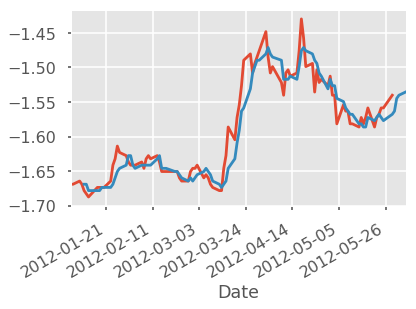

In [76]:
BAC_factor = factor.loc[factor.index[0:100], 'BAC']
BAC_smoothed_factor = smoothed_factor.loc[smoothed_factor.index[0:100], 'BAC']
BAC_factor.plot()
BAC_smoothed_factor.plot()
plt.show()

In [77]:
factor_start_date = smoothed_factor.index[0]
factor_end_date = smoothed_factor.index[-1]
(factor_start_date, factor_end_date)

(Timestamp('2012-01-11 00:00:00'), Timestamp('2016-01-05 00:00:00'))

In [78]:
factor = factor.loc[factor_start_date:factor_end_date,]
factor.head()

,CSCO,UAL,TROW,ISRG,NVR,PRGO,LECO,TPR,DVN,CR,...,PGR,WAT,NNN,IEX,BWA,NUS,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-11,-0.505708,-1.448165,-0.298828,1.645851,-0.873496,1.507930,1.098766,0.257452,-1.268868,1.039001,...,0.482722,-0.579266,0.344801,-0.179297,-0.496514,1.517125,-0.993027,1.333231,0.114934,-0.133323
2012-01-12,-0.501111,-1.406789,-0.353996,1.641254,-0.965443,1.517125,1.149337,0.229867,-1.222895,0.979235,...,0.588461,-0.524098,0.363191,-0.211478,-0.363191,1.567696,-1.052793,1.379205,0.197686,-0.225270
2012-01-13,-0.441345,-1.397594,-0.381580,1.641254,-0.951651,1.507930,1.140143,0.395372,-1.232089,1.025209,...,0.524098,-0.533292,0.331009,-0.096544,-0.271244,1.540112,-1.002222,1.347023,0.101142,0.045973
2012-01-17,-0.404567,-1.397594,-0.395372,1.627462,-1.020611,1.503333,1.149337,0.482722,-1.199908,0.960846,...,0.597655,-0.441345,0.358593,-0.142518,-0.376983,1.517125,-1.061988,1.282660,0.165505,0.078155
2012-01-18,-0.455138,-1.347023,-0.367788,1.618267,-0.988430,1.549307,1.126350,0.639031,-1.255076,0.983833,...,0.560877,-0.602253,0.349399,-0.156310,-0.441345,1.572293,-1.075780,1.057390,0.262049,0.170102


In [79]:
factor.tail()

,CSCO,UAL,TROW,ISRG,NVR,PRGO,LECO,TPR,DVN,CR,...,PGR,WAT,NNN,IEX,BWA,NUS,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-29,-0.381580,-0.303425,-0.970041,-0.859704,1.374607,-1.452762,-1.144740,-0.712589,-0.799939,-0.795341,...,1.089572,0.096544,0.119531,0.386177,-1.328634,-1.268868,0.616045,0.993027,-0.478124,0.772355
2015-12-30,-0.413761,-0.547085,-0.979235,-0.804536,1.333231,-1.461957,-1.107961,-0.763160,-0.850510,-0.786147,...,1.107961,0.128726,0.147115,0.404567,-1.282660,-1.172324,0.510306,0.970041,-0.399969,0.767757
2015-12-31,-0.363191,-0.662018,-0.974638,-0.896483,1.360815,-1.466554,-1.121753,-0.707992,-0.845912,-0.772355,...,1.048196,0.188491,0.206881,0.381580,-1.291855,-1.190713,0.643629,0.983833,-0.381580,0.795341
2016-01-04,-0.404567,-0.717186,-0.993027,-0.689602,1.250479,-1.438970,-1.094169,-0.491916,-0.855107,-0.767757,...,1.039001,0.087350,0.193089,0.399969,-1.347023,-1.052793,0.643629,1.084974,-0.427553,0.786147
2016-01-05,-0.390775,-0.850510,-0.993027,-0.537890,1.287258,-1.434373,-1.089572,-0.367788,-0.855107,-0.790744,...,1.039001,0.018389,0.091947,0.312620,-1.333231,-1.130948,0.570071,1.149337,-0.381580,0.841315


In [80]:
prices = transform_prices(hp.prices.reset_index())
prices = prices.loc[factor_start_date:factor_end_date]
prices = prices.loc[:,factor.columns]

In [81]:
print(factor.shape)
print(smoothed_factor.shape)
print(prices.shape)

(1002, 753)
(1002, 753)
(1002, 753)


In [88]:
# reshape for alphalens
factor.columns.name = 'ticker'
factor.set_index(['Date', 'ticker'], inplace=True)
factor.head()

KeyError: 'Date'

In [107]:
factor_data = {}

In [104]:
f = factor.stack()
sf = smoothed_factor.stack()

In [108]:
factor_data['factor'] = al.utils.get_clean_factor_and_forward_returns(f, prices, periods=[1])
factor_data['smoothed_factor'] = al.utils.get_clean_factor_and_forward_returns(sf, prices, periods=[1])

Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [109]:
clean_smooth_factor = factor_data['smoothed_factor']
clean_smooth_factor.head()

1D    factor  factor_quantile
date       asset                                     
2012-01-11 CSCO   0.004195 -0.459735                2
           UAL    0.028873 -1.425178                1
           TROW   0.000674 -0.266646                3
           ISRG   0.002582  1.664240                5
           NVR    0.000000 -0.694200                2